<div style="border:solid green 3px; padding: 20px">
<b>🥇 Егор, спасибо за доработки, проект принят, молодец!</b>
    
Ты провел  хорошую работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

<div style="border:solid green 2px; padding: 20px">
Егор, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!
    
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание, рекомендация.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал огромную работу :)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект  лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

#### Импортирование библиотек и открытие файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Импорт всех библиотек лучше делать в одной отдельной ячейке, чтобы при необходимости можно было ее перезапустить без влияния на другой код и перезаписи датафрейма. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, принял. Возьму на заметку. Здесь исправил
</div>

In [3]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Получение первичной информации о данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построение гистограмм для визуальной оценки данных

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

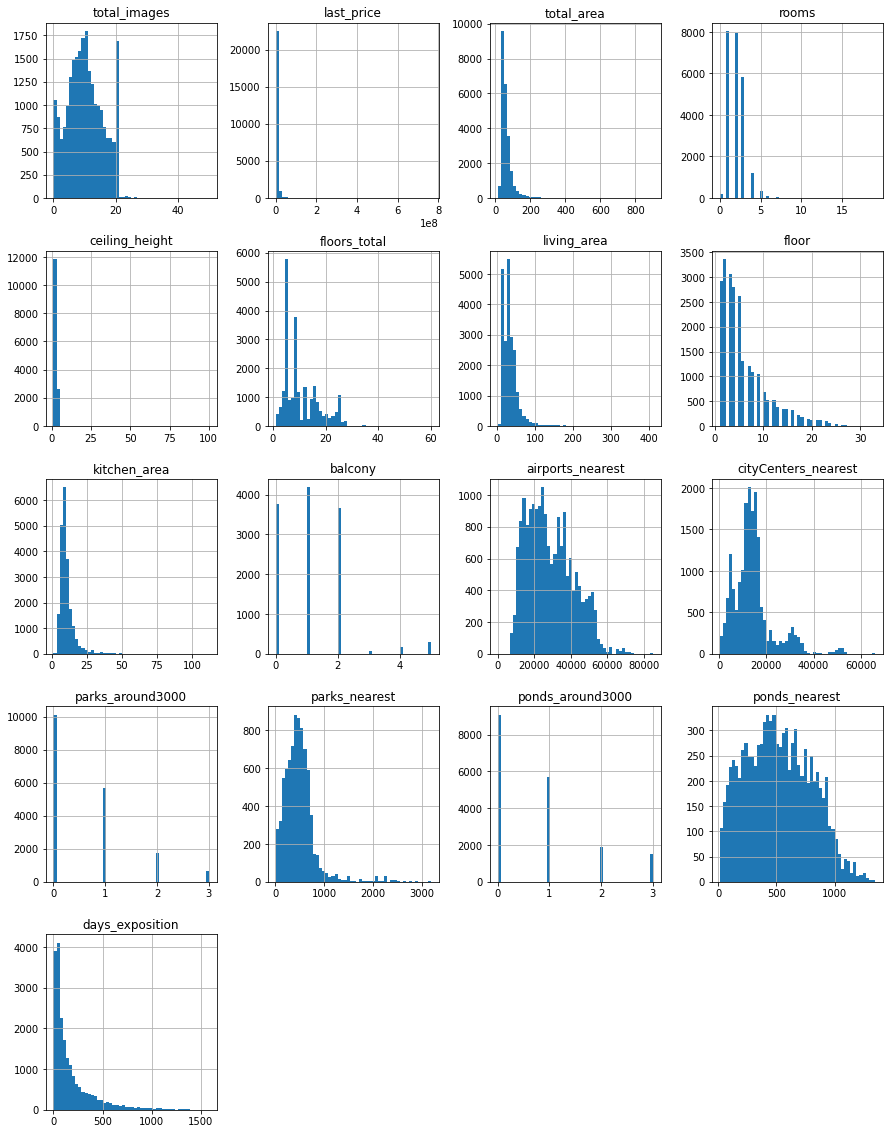

In [5]:
display(data.hist(figsize=(15, 20), bins=50))

In [6]:
display(data['last_price'].describe())

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [7]:
display(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Выводы по первичному знакомству с данными:** 
- В данных содержится 23 699 наблюдений и 22 колонки с информацией;
- В данных есть пропуски (больше всего в колонке "is_apartment");
- Гистограммы "ceiling_height" и "last_price" выглядят сомнительно. Скорее всего в данных есть аномальные значения (метод describe подтверждает наличие таких данных).

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, с данными познакомились!  </div>

### Выполните предобработку данных

#### Обработка пропусков

Определение в каких столбцах есть пропуски, и какие из них можно заполнить

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Всего в таблице 22 столбца**: из них **14** имеют пропуски ('ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition').

Из них точно нельзя заполнить **12** столбцов: 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'.

Попробуем обработать следующие **2** столбца: 'is_apartment', 'balcony'.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Почему пропуски в перечисленых столбцах нельзя заполнить?</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
По столбцам: 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition' - невозможно заполнить, так как они не подаются логической обработке. Мы лишь можем предположить те или иные значения в интервале от минимума до максимума.
По столбцам: 'parks_around3000', 'ponds_around3000' я пробовал внести значения в зависимости от значений столбцов 'parks_nearest', 'ponds_nearest', но чаще всего, если 'parks_around3000', 'ponds_around3000' пусты, то и 'parks_nearest', 'ponds_nearest' также пусты. А брать наугад также нежелательно. Значения могут быть разными (от 0 до неизвестно).
</div>

**Обрабатываем пропуски в столбце 'is_apartment'**

In [9]:
display(data[data['is_apartment'].isna()].head())
display(data['is_apartment'].isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


20924

In [10]:
display(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64

Считаем, что, если продавец не указал значение в столбце 'is_apartment', значит тип жилья - квартира (False)

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)
display(data['is_apartment'].isna().sum())

0

**Обрабатываем пропуски в столбце 'balcony'**

In [12]:
display(data[data['balcony'].isna()].head())
display(data['balcony'].isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


11519

In [13]:
display(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Считаем, что, если продавец не указал значение в столбце 'balcony', значит количество балконов равно нулю

In [14]:
data['balcony'] = data['balcony'].fillna(0)
display(data['balcony'].isna().sum())
data['balcony'] = data['balcony'].astype('int', errors='ignore')

0

**Возможные причины появления пропусков:**
- Человеческий фактор (незаполнение некоторых полей);
- Отсутствие информации по причине пропусков в смежных столбцах (связанных);
- Ошибки при работе с данными.

#### Рассмотрение типов данных столбцов

**Определение столбцов, в которых необходимо изменить тип данных**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исходя из полученной информации, необходимо изменить только тип данных в столбце 'first_day_exposition'. Стоить провести замену с типа 'object' в тип 'datetime'.

**Преобрзование типа данных в выбранном столбце**

In [16]:
display(data['first_day_exposition'].head())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') 

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Время можно убрать</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Думал, что, возможно, в столбце есть значения с временем. Код откорректировал.
</div>

In [18]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Причины изменения типов данных:**
- Для быстрой и корректной работы тип 'object' был изменен на 'datetime'.

#### Обработка дубликатов

**Определение наличия явных дубликатов**

In [19]:
display(data.duplicated().sum())

0

**Определение наличия неявных дубликатов и их обработка**

In [20]:
display(data['locality_name'].unique())
display(data['locality_name'].nunique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

364

In [21]:
def rename_pos(loc_name):
    for symbol in loc_name:
        if symbol < 'а' and symbol != ' ':
            return loc_name[loc_name.index(symbol):]

data['cor_locality_name'] = data[data['locality_name'].notna()]['locality_name'].apply(rename_pos)

In [22]:
display(sorted(data[data['cor_locality_name'].notna()]['cor_locality_name'].unique()))
display(data['cor_locality_name'].nunique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

305

**Выводы по обработке дубликатов:** 
- В датасете отсутствовали явные дубликаты;
- В датасете были обнаружены и откорректированы **59** (364 - 305) неявных дубликатов в столбце 'locality_name'.

### Добавьте в таблицу новые столбцы

Добавление столбца "Цена одного квадратного метра"

In [23]:
data['price_per_m2'] = round(data['last_price'] / data['total_area'], 2)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cor_locality_name,price_per_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00


Добавление столбца "День недели публикации объявления"

In [24]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cor_locality_name,price_per_m2,day_of_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1


Добавление столбца "Месяц публикации объявления"

In [25]:
data['month'] = data['first_day_exposition'].dt.month
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cor_locality_name,price_per_m2,day_of_week,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6


Добавление столбца "Год публикации объявления"

In [26]:
data['year'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cor_locality_name,price_per_m2,day_of_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018


Добавление столбца "Тип этажа квартиры"

In [27]:
# Данная категоризация сделана для простоты работы с данными при их анализе
def type_of_floor(row):
    if row['floor'] == 1:
        return 0 # Первый этап
    elif row['floor'] == row['floors_total']:
        return 2 # Последний этап
    else:
        return 1 # Другой
    
data['type_of_floor'] = data.apply(type_of_floor, axis=1)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cor_locality_name,price_per_m2,day_of_week,month,year,type_of_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,1
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,Шушары,82920.79,1,12,2018,0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,1
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,1
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,1


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Тип этажа лучше для ясности прописать текстом</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Далее при анализе возникали трудности, так как в построении графиков выдавало ошибку в связи с типом данных 'str'. Решил поставить интовые значения. Могу сделать отдельную информационную таблицу)
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Да, scatterplot, например, не получится построить. Но можно выбрать другой тип графика
</div>

Добавление столбца "Расстояние до центра города в километрах"

In [28]:
data['centre_nearest'] = round(data['cityCenters_nearest'] / 1000)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cor_locality_name,price_per_m2,day_of_week,month,year,type_of_floor,centre_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,1,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,Шушары,82920.79,1,12,2018,0,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,1,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,1,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,1,8.0


**Вывод по разделу:**
- В таблицу были добавлены новые столбцы: 'centre_nearest' (расстояние от центра в км), 'type_of_floor' (0-'первый этаж', 1-'другой', 2-'последний'), 'year', 'month', 'day_of_week', 'price_per_m2'.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
После этапа предобработки также нужно сделать краткий резюмирующий вывод о проделанной работе.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Указал выводы по 3 разделу. По второму разделу делал вывод во втором)
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Дополнительные данные рассчитаны и добавлены верно! Можно приступать к исследованию🙂 </div>

### Проведите исследовательский анализ данных

#### Изучение параметров и обработка аномалий

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

'Правая граница графика распределения: 123.0'

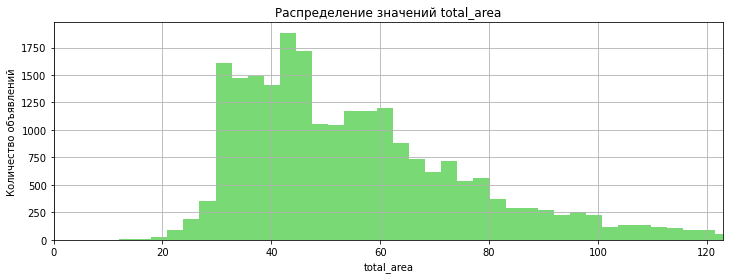

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

'Правая граница графика распределения: 74.0'

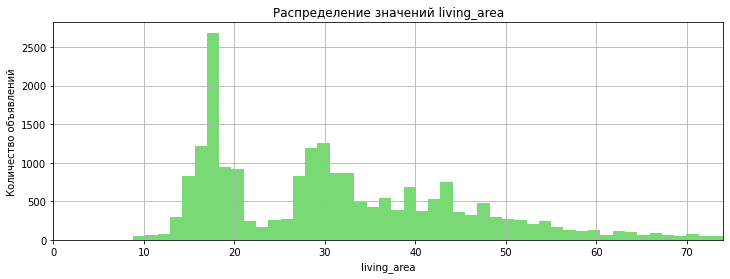

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

'Правая граница графика распределения: 21.0'

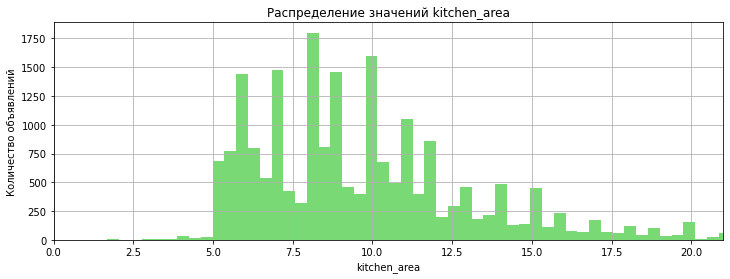

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

'Правая граница графика распределения: 26424027.0'

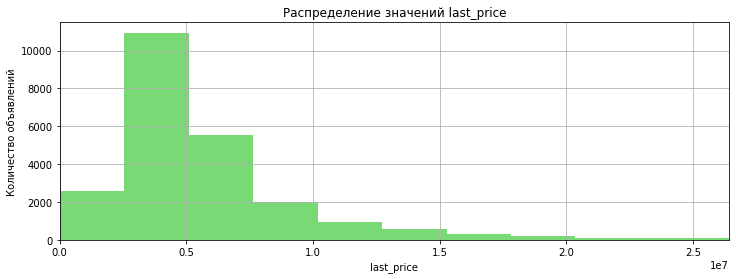

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

'Правая граница графика распределения: 4.0'

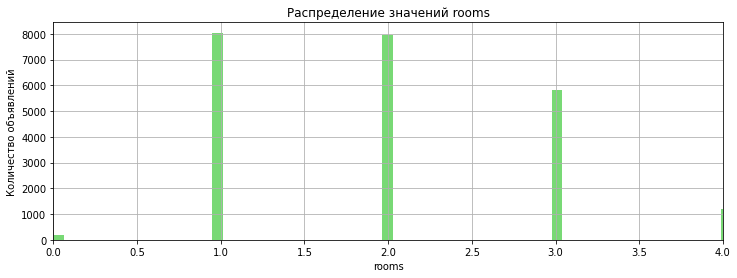

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

'Правая граница графика распределения: 5.0'

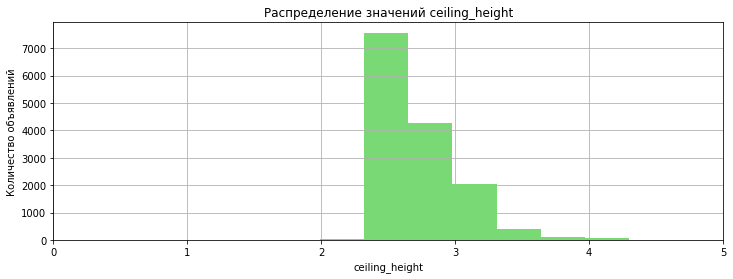

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

'Правая граница графика распределения: 22.0'

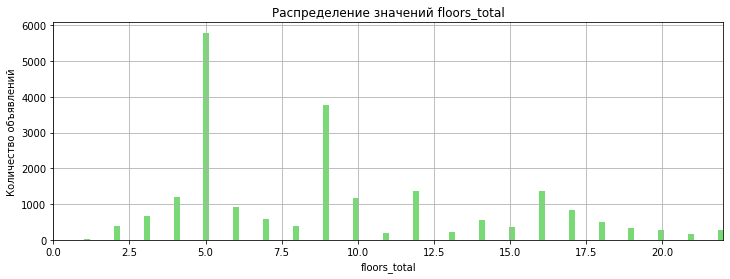

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

'Правая граница графика распределения: 30315.0'

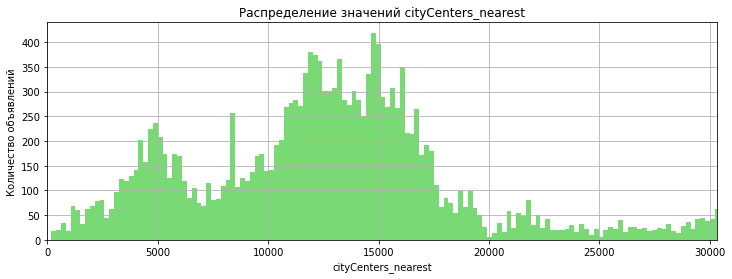

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

'Правая граница графика распределения: 1140.0'

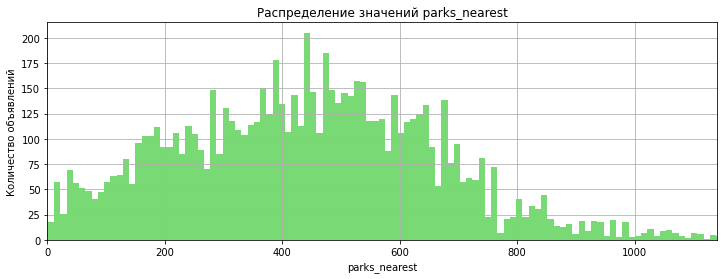

In [56]:
parametrs = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height',
             'floors_total', 'cityCenters_nearest', 'parks_nearest']

for parametr in parametrs:
    display(data[parametr].describe())
    data[parametr].hist(bins = 300, figsize = (12, 4), color='#78d975')
    sigma_p = round(data[parametr].median() + 2 * data[parametr].std(), 0)
    display(f'Правая граница графика распределения: {sigma_p}')
    plt.xlim(0, sigma_p)
    plt.title(f'Распределение значений {parametr}')
    plt.xlabel(f'{parametr}') 
    plt.ylabel('Количество объявлений')
    plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

 - Из-за наличия больших значений графики получаются очень сжатыми и реальный диапазон значений очень сложно определить, можно рассмотреть его поближе, ограничив значения на оси с помощью `plt.xlim()`. Пример привел ниже

 - Необходимо подписывать название для каждого графика и оси на нем. Есть [хорошая статья](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/), которая подскажет как это правильно сделать).</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Убрал boxplot, оставил только график распределения и описание. Правая граница графика (95% по правилу 3 сигм) указана перед графиком.
</div>

count    23699.000000
mean         1.017680
std          0.513371
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: type_of_floor, dtype: float64

<AxesSubplot:>

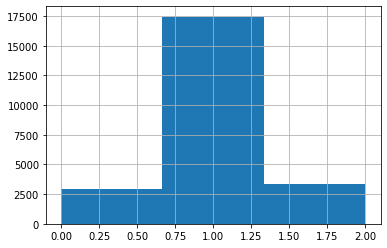

In [74]:
display(data['type_of_floor'].describe())
display(data['type_of_floor'].hist(grid=True, bins=3))

**Обнаруженные аномалии по указанным параметрам:**
1. Столбец 'total_area'. Основная масса квартир имеет площадь до 150 м2. Для дальнейшего анализа предлагается исключить из выборки квартиры с площадью больше 150 м2.
2. Столбец 'living_area'. Основная масса квартир имеет жилую площадь до 80 м2. В связи с мультиколлинеарностью фактора со значениями столбца 'total_area' данный столбец можно не фильтровать.
3. Столбец 'kitchen_area'. Основная масса квартир имеет площадь кухни до 30 м2. В связи с мультиколлинеарностью фактора со значениями столбца 'total_area' данный столбец можно не фильтровать.
4. Столбец 'last_price'. Основная масса квартир имеет стоимость до 27 000 000. Для дальнейшего анализа предлагается исключить из выборки квартиры со стоимостью больше 27 000 000.
5. Столбец 'rooms'. Основная масса квартир имеет до 5 комнат. В связи с мультиколлинеарностью фактора со значениями столбца 'total_area' данный столбец можно не фильтровать.
6. Столбец 'ceiling_height'. Основная масса квартир имеет высоту потолков до 4 метров. Стоит провести анализ квартир, у которых высота потолка выше 4 метров, так как, скорее, всего была допущена ошибка при внесении значений в данный столбец.
7. Столбец 'floors_total'. Основная масса квартир располагаются в зданиях с этажностью до 35. Однако в столбце есть значения от 35 до 60 этажей. Данные значения стоит оставить без изменений в связи с возможностью их существования.
8. Столбец 'cityCenters_nearest'. Основная масса квартир располагаются на расстоянии до 35 км от центра. Однако в столбце есть значения до 66 км. Данные значения стоит оставить без изменений в связи с возможностью их существования.
9. Столбец 'parks_nearest'. Основная масса квартир располагаются на расстоянии до 1 км до ближайшего парка. Однако в столбце есть значения до 3,3 км. Данные значения стоит оставить без изменений в связи с возможностью их существования.
10. Столбец 'parks_nearest'. Основная масса квартир располагаются на расстоянии до 1 км до ближайшего парка. Однако в столбце есть значения до 3,3 км. Данные значения стоит оставить без изменений в связи с возможностью их существования.
11. Столбец 'type_of_floor'. Данные столбец не подлежит корректировке в связи с категориальным характером его значений.

In [75]:
new_data = data.query('(total_area < 150) and (last_price < 27_000_000)')
new_data.reset_index(drop=True, inplace=True)

In [76]:
# код ревьюера
new_data.shape[0] / 23699

0.9697455588843411

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Мы лишились почти 20% данных. Это может повлиять на результаты исследования. 
    
Если проводить чистку данных по столбцу с пропусками - это привидет к удалению из датасета всех строк с пропусками в этом столбце. Нужно это учитывать. Так же стоит пересмотреть некоторые значения, действительно ли они являются аномальными?
    
Итоговая потеря данных не должна превышать 10-15% от исходного объема.

[Здесь](https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27) можно дополнительно почитать про чистку данных.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Удалил фильтры по следующим столбцам: 'rooms', 'kitchen_area', 'living_area'. В 'обнаруженных аномалиях' также указал, что к данным столбцам требования не предъявляются. Верхнюю границу жилья увеличил с 15 млн до 27 млн.
    
**Итог**: лишились около 3% данных.
</div>

In [77]:
display(new_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cor_locality_name,price_per_m2,day_of_week,month,year,type_of_floor,centre_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,1,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,Шушары,82920.79,1,12,2018,0,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,1,14.0
3,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,1,8.0
4,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,NaN,55.0,Янино-1,95065.79,0,9,2018,1,NaN


In [78]:
def cor_height(ceiling_height):
    if ceiling_height > 50:
        return None
    elif ceiling_height > 24:
        return (ceiling_height / 10)
    elif ceiling_height > 5:
        return None
    elif ceiling_height > 2.49:
        return ceiling_height
    return None
        
    
new_data['correct_height'] = new_data['ceiling_height'].apply(cor_height)

/tmp/ipykernel_31/1799961197.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['correct_height'] = new_data['ceiling_height'].apply(cor_height)


In [79]:
display(new_data['correct_height'].describe())

count    13935.000000
mean         2.710653
std          0.250695
min          2.500000
25%          2.500000
50%          2.650000
75%          2.800000
max          5.000000
Name: correct_height, dtype: float64

**Выводы по изучению параметров и обработке аномалий:**
- Изучение параметров проводилось с помощью анализа описательной части значений, а тажке графика (гистограммы) распределения значений. В ходе изучение были обнаружены ряд аномалий.
- Один тип аномалий был связан с невозможностью существования данных значений (высота потолков - до 27 м). Анамолия была обработана с помощью логических преобразований.
- Другой тип аномалий был связан с ограниченностью (непопулярностью) данных объявлений (площадь жилья - 900 м2). Анамолия была обработана с помощью фильтрации данных. 

#### Определение скорости продажи квартир

count    19991.000000
mean       177.765745
std        216.505231
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

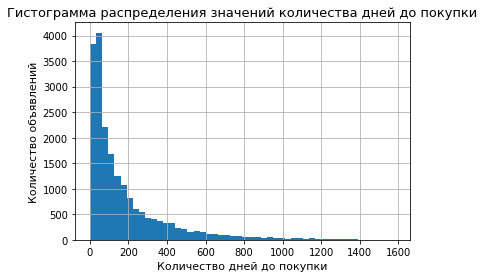

In [80]:
display(new_data['days_exposition'].describe())

new_data['days_exposition'].plot(kind='hist', grid=1, bins=50)
plt.xlabel('Количество дней до покупки', size=11)
plt.ylabel('Количество объявлений', size=11)
plt.title('Гистограмма распределения значений количества дней до покупки', size=13)

plt.show()

**Выводы по разделу:**
Среднее значение количества дней, за которые продается квартира, - 178; медиана равна 94 дням. Будем считать, что срок продажи квартиры больше 226 дней будет необычайно долгим (около 25% наблюдений), а срок меньше 44 дней - необычайно коротким (около 25% наблюдений).

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

При ответе на вопрос о быстрых и долгих продажах лучше обратить внимание на 25 и 75 квартили. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вывод откорректировал.
</div>

#### Определение факторов, которые больше всего влияют на общую стоимость объекта

Проведем комплексный анализ влияния указанных параметров (факторов) на общую стоимость без учета влияния города.

'Коэффициент корреляции Пирсона цены и total_area: 0.76'

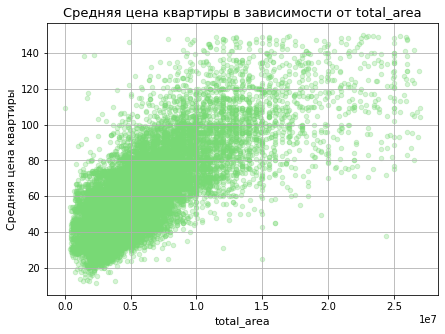

'Коэффициент корреляции Пирсона цены и living_area: 0.63'

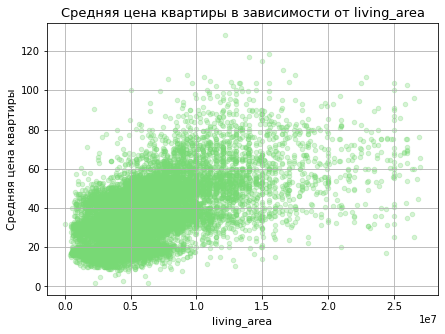

'Коэффициент корреляции Пирсона цены и kitchen_area: 0.58'

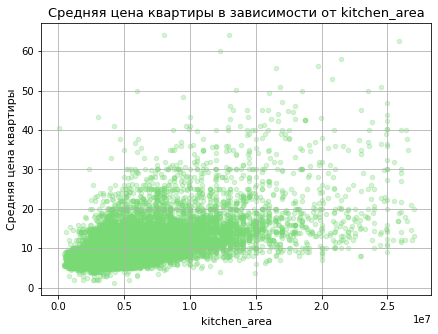

'Коэффициент корреляции Пирсона цены и type_of_floor: 0.05'

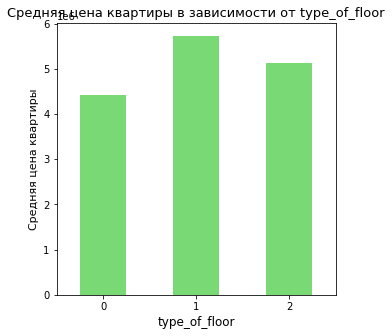

'Коэффициент корреляции Пирсона цены и rooms: 0.46'

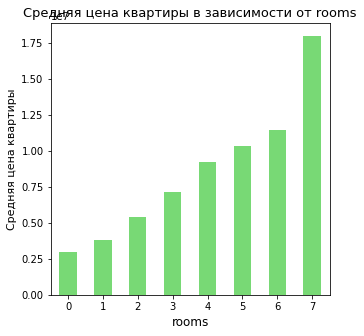

'Коэффициент корреляции Пирсона цены и year: -0.02'

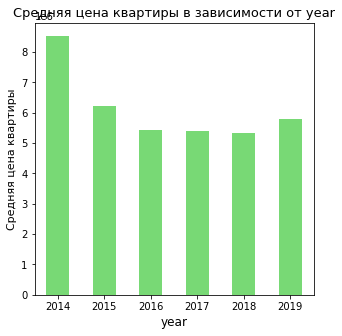

'Коэффициент корреляции Пирсона цены и month: 0.0'

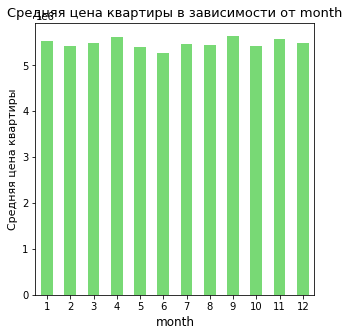

'Коэффициент корреляции Пирсона цены и day_of_week: -0.02'

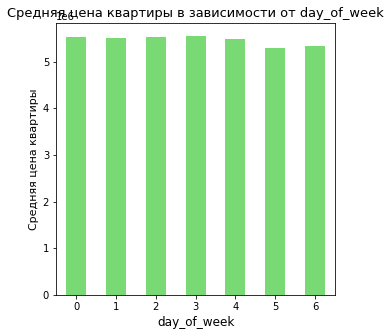

In [86]:
parametrs_11 = ['total_area', 'living_area', 'kitchen_area']

for parametr in parametrs_11:
    correlation = round(new_data['last_price'].corr(new_data[parametr]), 2)
    display(f'Коэффициент корреляции Пирсона цены и {parametr}: {correlation}')
    new_data.plot(x='last_price', y=parametr, kind='scatter', grid=True, alpha=0.3, figsize=(7, 5), color='#78d975')
    plt.title(f'Средняя цена квартиры в зависимости от {parametr}', size=13)
    plt.xlabel(f'{parametr}', size=11)
    plt.ylabel('Средняя цена квартиры', size=11)
    
    plt.show()

parametrs_12 = ['type_of_floor', 'rooms', 'year', 'month', 'day_of_week']

for parametr in parametrs_12:
    correlation = round(new_data['last_price'].corr(new_data[parametr]), 2)
    display(f'Коэффициент корреляции Пирсона цены и {parametr}: {correlation}')
    new_data.groupby(parametr)['last_price'].mean().plot(kind='bar', figsize=(5, 5), color='#78d975')
    plt.xticks(rotation=0)
    plt.title(f'Средняя цена квартиры в зависимости от {parametr}', size=13)
    plt.xlabel(f'{parametr}', size=12)
    plt.ylabel('Средняя цена квартиры', size=11)
    
    plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

 - Не забывай подписывать названия и оси на графиках

 - При ограниченном количестве значений метрик (категориальные и дискретные переменные), таких как количество комнат, категория этажа, а также день, месяц и год размещения объявления, лучше использовать barplot, предварительно рассчитав среднюю цену с группировкой по нужной метрике. Так зависимости будут гораздо нагляднее. Пример написал ниже.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Названия и оси на графиках указал. График по категориальным значениям сделал по типу столбчатой диаграммы.
</div>

Опеределим значения корреляции Пирсона в зависимости от населенных пунктов. Для анализа примем 5 самых "популярных" населенных пунктов.

In [87]:
top_city = new_data['cor_locality_name'].value_counts()[:5]
for city in top_city.index:
    parametrs_2 = new_data[new_data['cor_locality_name'] == city]
    param_table = parametrs_2.pivot_table(index='first_day_exposition', values=['total_area', 'type_of_floor', 'last_price',
                                                                                'rooms', 'year', 'month', 'day_of_week', 
                                                                                'living_area', 'kitchen_area'], aggfunc='median')
    display(param_table.corr())

,day_of_week,kitchen_area,last_price,living_area,month,rooms,total_area,type_of_floor,year
day_of_week,1.000000,0.043280,0.005954,0.020127,-0.002274,-0.007136,0.010289,0.021472,0.044855
kitchen_area,0.043280,1.000000,0.557649,0.256730,0.020500,0.091436,0.495036,0.051492,-0.200630
last_price,0.005954,0.557649,1.000000,0.643012,0.042977,0.434276,0.785248,0.052586,-0.205430
living_area,0.020127,0.256730,0.643012,1.000000,0.034680,0.815170,0.860843,0.045185,-0.206133
month,-0.002274,0.020500,0.042977,0.034680,1.000000,0.038411,0.042564,-0.010247,-0.241151
rooms,-0.007136,0.091436,0.434276,0.815170,0.038411,1.000000,0.717260,0.026593,-0.168054
total_area,0.010289,0.495036,0.785248,0.860843,0.042564,0.717260,1.000000,0.039249,-0.265612
type_of_floor,0.021472,0.051492,0.052586,0.045185,-0.010247,0.026593,0.039249,1.000000,0.005080
year,0.044855,-0.200630,-0.205430,-0.206133,-0.241151,-0.168054,-0.265612,0.005080,1.000000


,day_of_week,kitchen_area,last_price,living_area,month,rooms,total_area,type_of_floor,year
day_of_week,1.000000,0.049552,0.087479,0.077624,0.033100,0.068260,0.079603,0.004735,0.043567
kitchen_area,0.049552,1.000000,0.377220,0.122889,0.038510,0.203689,0.366508,0.049297,0.004947
last_price,0.087479,0.377220,1.000000,0.759846,0.035566,0.756555,0.849744,0.045621,0.097990
living_area,0.077624,0.122889,0.759846,1.000000,0.054976,0.882136,0.895140,0.026265,-0.037636
month,0.033100,0.038510,0.035566,0.054976,1.000000,0.026469,0.050091,-0.058696,-0.201908
rooms,0.068260,0.203689,0.756555,0.882136,0.026469,1.000000,0.907221,-0.013681,-0.061380
total_area,0.079603,0.366508,0.849744,0.895140,0.050091,0.907221,1.000000,0.019097,-0.048137
type_of_floor,0.004735,0.049297,0.045621,0.026265,-0.058696,-0.013681,0.019097,1.000000,0.021882
year,0.043567,0.004947,0.097990,-0.037636,-0.201908,-0.061380,-0.048137,0.021882,1.000000


,day_of_week,kitchen_area,last_price,living_area,month,rooms,total_area,type_of_floor,year
day_of_week,1.000000,0.019254,0.030312,0.010038,0.003348,0.004458,0.003993,-0.016833,0.024250
kitchen_area,0.019254,1.000000,0.311085,0.172005,0.024357,0.265476,0.405032,0.009726,0.055149
last_price,0.030312,0.311085,1.000000,0.839913,0.041080,0.822849,0.884690,0.047176,0.104611
living_area,0.010038,0.172005,0.839913,1.000000,-0.036164,0.876543,0.903587,-0.013429,-0.025117
month,0.003348,0.024357,0.041080,-0.036164,1.000000,0.015901,0.033835,0.010623,-0.181465
rooms,0.004458,0.265476,0.822849,0.876543,0.015901,1.000000,0.913912,-0.020416,-0.051682
total_area,0.003993,0.405032,0.884690,0.903587,0.033835,0.913912,1.000000,0.010092,-0.024083
type_of_floor,-0.016833,0.009726,0.047176,-0.013429,0.010623,-0.020416,0.010092,1.000000,0.020996
year,0.024250,0.055149,0.104611,-0.025117,-0.181465,-0.051682,-0.024083,0.020996,1.000000


,day_of_week,kitchen_area,last_price,living_area,month,rooms,total_area,type_of_floor,year
day_of_week,1.000000,0.016971,0.007776,0.057775,-0.076944,0.104177,0.044582,0.011510,0.075049
kitchen_area,0.016971,1.000000,0.370219,0.142377,0.051747,0.190646,0.393425,0.047052,-0.003358
last_price,0.007776,0.370219,1.000000,0.818069,0.080112,0.789784,0.875364,0.045241,0.136003
living_area,0.057775,0.142377,0.818069,1.000000,0.008383,0.920737,0.938577,0.004699,0.024189
month,-0.076944,0.051747,0.080112,0.008383,1.000000,0.024154,0.043167,0.102539,-0.127709
rooms,0.104177,0.190646,0.789784,0.920737,0.024154,1.000000,0.893700,0.011211,0.045268
total_area,0.044582,0.393425,0.875364,0.938577,0.043167,0.893700,1.000000,0.001956,0.001611
type_of_floor,0.011510,0.047052,0.045241,0.004699,0.102539,0.011211,0.001956,1.000000,0.041221
year,0.075049,-0.003358,0.136003,0.024189,-0.127709,0.045268,0.001611,0.041221,1.000000


,day_of_week,kitchen_area,last_price,living_area,month,rooms,total_area,type_of_floor,year
day_of_week,1.000000,-0.004065,0.017666,-0.078678,-0.066364,-0.000182,-0.035989,0.006384,0.065208
kitchen_area,-0.004065,1.000000,0.551644,0.188300,-0.006241,0.125342,0.454546,0.083563,0.096019
last_price,0.017666,0.551644,1.000000,0.687804,0.025338,0.595867,0.826581,0.064928,0.079120
living_area,-0.078678,0.188300,0.687804,1.000000,0.049175,0.857535,0.892597,-0.021994,-0.068133
month,-0.066364,-0.006241,0.025338,0.049175,1.000000,0.050251,0.036297,0.019295,-0.244347
rooms,-0.000182,0.125342,0.595867,0.857535,0.050251,1.000000,0.812847,-0.067657,-0.046898
total_area,-0.035989,0.454546,0.826581,0.892597,0.036297,0.812847,1.000000,0.020504,0.014826
type_of_floor,0.006384,0.083563,0.064928,-0.021994,0.019295,-0.067657,0.020504,1.000000,0.025778
year,0.065208,0.096019,0.079120,-0.068133,-0.244347,-0.046898,0.014826,0.025778,1.000000


**Выводы по разделу:**
- Из указанных параметров больше всего влияние на стоимость объекта имеет его общая площадь. Стоимость объекта имеет положительную корреляцию с площадью объектов со среднем значением 0.76. В засимости от города данное значение изменяется и может достигать 0.84.
- Стоит отметить, что средняя положительная корреляция также наблюдается со следующими факторами: площадь кухни, жилая площадь, количество комнат. Данное явление обусловлено мультиколлиеарностью факторов с общей площадью объекта.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Отлично, факторы, влияющие(или нет) на стоимость квартиры рассмотрены!</div>

#### Определение стоимости квадртаного метра в различных населенных пунктах

In [88]:
top_cities = new_data['cor_locality_name'].value_counts()[:10]
table = new_data.query('cor_locality_name in @top_cities.index').pivot_table(index='cor_locality_name',
                                                                                   values=['last_price', 'total_area'])
table['price_per_m2'] = round(table['last_price'] / table['total_area'], 2)
table['count'] = top_cities
table.columns = ['price_mean', 'total_area_mean', 'price_per_m2', 'number of ads']
display(table.sort_values(by='price_per_m2', ascending=0))

,price_mean,total_area_mean,price_per_m2,number of ads
cor_locality_name,,,,
Санкт-Петербург,6.546123e+06,58.850910,111232.32,15042
Пушкин,5.893226e+06,56.836816,103686.78,358
Кудрово,4.358688e+06,46.395403,93946.55,472
Парголово,4.477609e+06,51.061350,87690.76,326
Мурино,3.678462e+06,44.098932,83413.86,590
Шушары,4.108082e+06,53.821273,76328.22,440
Колпино,3.866289e+06,52.358279,73842.93,337
Гатчина,3.488337e+06,50.942932,68475.38,307
Всеволожск,3.779720e+06,55.780428,67760.69,397


**Выводы по разделу:**
- Самая высокая средняя стоимость 1 м2 квартиры из 10 самых "популярных" городов - в Санкт-Петербурге (111 232,32). 
- Самая низкая средняя стоимость 1 м2 квартиры из 10 самых "популярных" городов - в Выборге (57 665,248).

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Здесь результат не совсем корректный из-за потери данных. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Написал вывод по обновленным данным.
</div>

#### Определение влияние параметра "расстояние до центра города" на стоимость квартиры

In [89]:
saint_p = new_data[new_data['cor_locality_name'] == 'Санкт-Петербург'].pivot_table(index='centre_nearest', 
                                                                                   values=['last_price', 'total_area'])
saint_p['centre_nearest'] = saint_p.index
saint_p['price_per_m2'] = round(saint_p['last_price'] / saint_p['total_area'], 2)
display(saint_p.head())

,last_price,total_area,centre_nearest,price_per_m2
centre_nearest,,,,
0.0,9.248333e+06,80.166667,0.0,115363.83
1.0,1.082936e+07,82.748590,1.0,130870.62
2.0,1.031133e+07,81.224659,2.0,126948.31
3.0,9.145804e+06,77.873119,3.0,117444.95
4.0,9.587490e+06,78.959460,4.0,121422.94


-0.83

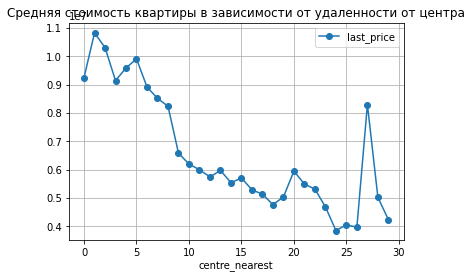

-0.66

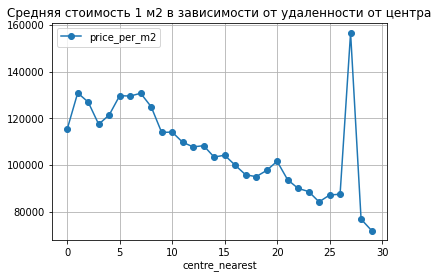

In [90]:
display(round(saint_p['last_price'].corr(saint_p['centre_nearest']), 2))
saint_p.plot(y='last_price', grid=1, kind='line', title='Средняя стоимость квартиры в зависимости от удаленности от центра', style='o-')
plt.show()
display(round(saint_p['price_per_m2'].corr(saint_p['centre_nearest']), 2))
saint_p.plot(y='price_per_m2', grid=1, kind='line', title='Средняя стоимость 1 м2 в зависимости от удаленности от центра', style='o-')
plt.show()

In [91]:
display(new_data[(new_data['cor_locality_name'] == 'Санкт-Петербург') & (new_data['centre_nearest'] == 27)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cor_locality_name,price_per_m2,day_of_week,month,year,type_of_floor,centre_nearest,correct_height
717,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,NaN,128.0,Санкт-Петербург,193918.92,1,11,2017,1,27.0,3.13
5776,6,2250000.0,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,NaN,178.0,Санкт-Петербург,70312.50,1,2,2018,2,27.0,NaN


**Выводы по разделу:** 
- По результатам проведенного анализа была обнаружена высокая отрицательная корреляция (-0.77) стоимости квартиры и удаленности от центра города.
- На расстоянии 27 км от центра была обнаружена аномалия (выброс). Скорее всего данный выброс образовался в связи с ограниченностью количеством объявлений с такой удаленностью (2 шт.)

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Тут все верно, молодец! Здорово, что обратил внимание на всплеск на 27 км и проанализировал его.</div>

### Напишите общий вывод

**Общие выводы по работе:**
1. В рамках получения и первичного анализа данных были получены 23 699 наблюдений с 22 колонками показателей;

2. После первичного анализа данных были выполнены следующие операции:
- Заполнены пропуски по столбцам 'is_apartment' и 'balcony', а также указаны возможные причины появления всех пропусков в таблице;
- Изменен тип данных столбца 'first_day_exposition' с 'object' на 'datetime';

3. В процессе анализа данных в части значений показателей были обнаружены и исключены аномалии в следующих столбцах: 'total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height

4. По результатам исследовательского анализа были сделаны следующие выводы:
- Среднее значение количества дней, за которые продается квартира, - 179; медиана равна 98 дням. Будем считать, что срок продажи квартиры больше 450 дней будет необычайно долгим (около 10% наблюдений), а срок меньше 18 дней - необычайно коротким (около 10% наблюдений).
- Больше всего влияние на стоимость объекта имеет его общая площадь. Стоимость объекта имеет положительную корреляцию с площадью объектов со среднем значением 0.73. В засимости от города данное значение изменяется и может достигать 0.86.
- Стоит отметить, что средняя положительная корреляция также наблюдается со следующими факторами: площадь кухни, жилая площадь, количество комнат. Данное явление обусловлено мультиколлиеарностью факторов с общей площадью объекта.
- Самая высокая средняя стоимость 1 м2 квартиры из 10 самых "популярных" городов - в Санкт-Петербурге (106 251,27). 
- Самая низкая средняя стоимость 1 м2 квартиры из 10 самых "популярных" городов - во Всеволожске (66 752,62).
- В Санкт-Петербурге на стоимость квартиры также влияет показатель удаленности от центра города. Была обнаружена высокая отрицательная корреляция (-0.77) стоимости квартиры и удаленности от центра города.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 


Хороший итоговый вывод!


    
**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.